In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import glob
import joblib
import pandas as pd
#from pathlib import Path
import matplotlib.pyplot as plt

from phonetics import utils as u
from phonetics import phone_info as ph_i 
from phonetics import plots as plots

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [8]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/maria_v0/feat_768d'
feat_path = f'{experiment_path}/feat_768d_layer_12.csv'

In [ ]:
# feat_paths = glob.glob(f'{root}/feat/feat_last/*.csv')
# lab_paths = glob.glob(f'{root}/lab/*.lab')

In [9]:
df_anotated_all = pd.read_csv(feat_path, index_col=0)

<Axes: xlabel='phone_base'>

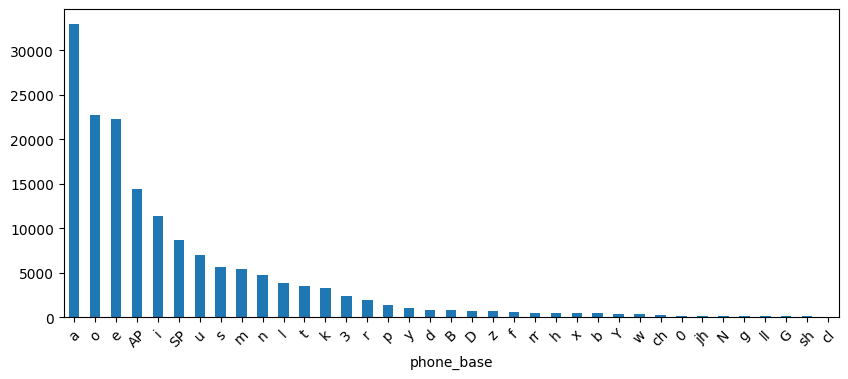

In [11]:
plt.figure(figsize=(10,4))
df_anotated_all['phone_base'].value_counts().plot.bar(rot = 45)

In [12]:
len(df_anotated_all['phone_base'])*0.02/60

53.20033333333333

In [13]:
df_anotated_all['song'].unique()

array(['ES_volver_a_los_17', 'ES_la_sobra_de_la_luz', 'CA_impro3',
       'CA_la_pastoreta', 'ES_el_dia_que_naci_yo', 'CA_meteorit_ferit',
       'CA_sol_solet', 'ES_lucero_de_la_maniana',
       'ES_tu_que_vienes_a_rondarme', 'CA_mabravasa', 'CA_impro2',
       'ES_yo_vi_secarse_una_jara', 'CA_sol_solet-2', 'ES_tras_de_ti',
       'ES_negro_infinito', 'ES_ventura2', 'CA_tu_saps',
       'ES_que_lejos_estoy_de_la_tierra', 'ES_ventura', 'ES_galapaguito',
       'ES_milagro', 'CA_sibi_la', 'CA_un_gat_petit_tv3', 'CA_impro',
       'CA_viola', 'ES_quien_me_ama', 'CA_no_he_desitjat',
       'CA_xiqueta_meuna', 'ES_hildegart', 'ES_jota'], dtype=object)

In [14]:
umap2 = u.train_umap(
        df_anotated_all,
        #exclude_phones = ['SP'],
        n_components=2, 
        n_neighbors=100, 
        min_dist=0.1,
        save_model = False,
        folder = None)

Training UMAP with parameters n_components : 2, n_neighbors 100, min_dist : 0.1


In [15]:
df_proj2d = u.make_proj_anotated_feat_df(df_anotated_all, 
                                        umap2,
                                        save_df = False,
                                        folder = None)

Applying dimensional reduction
Reduced to 2 dimensions


In [16]:
unique_phones = [k for k in df_proj2d['phone_base'].value_counts().keys() if k != 'AP']

Making a 2d plot


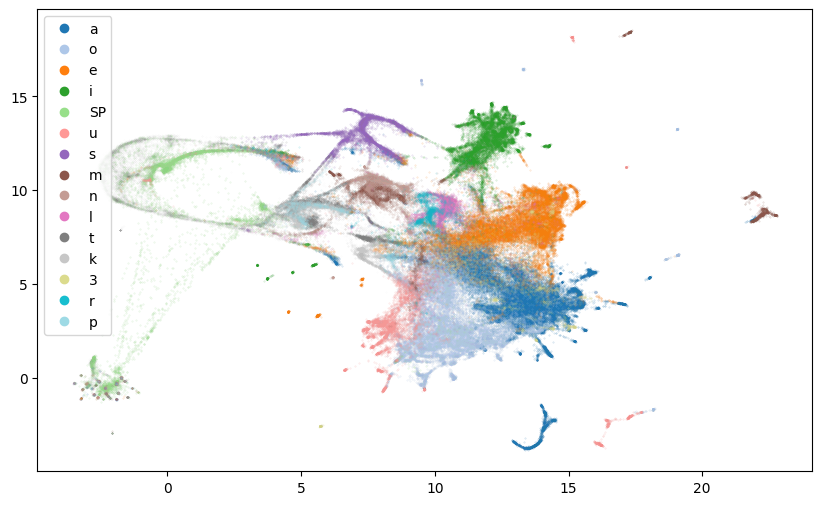

In [17]:
plots.make_tagged_LS_plot(df_proj2d,
            phones = unique_phones[:15],
            alpha = 0.25, 
            s = 0.1,
            show_global=True)
            # xlim = [ -5, 20],
            # ylim = [-10, 18])

Making a 2d plot


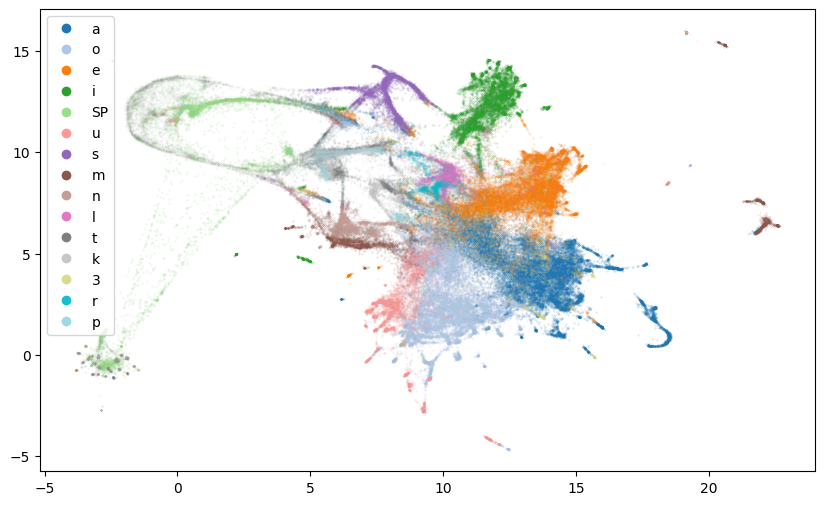

In [15]:
plots.make_tagged_LS_plot(df_proj2d,
            phones = unique_phones[:15],
            alpha = 0.25, 
            s = 0.1,
            show_global=True)
            # xlim = [ -5, 20],
            # ylim = [-10, 18])

Making a 2d plot


(np.float64(-5.0), np.float64(20.0), np.float64(-3.0), np.float64(18.0))

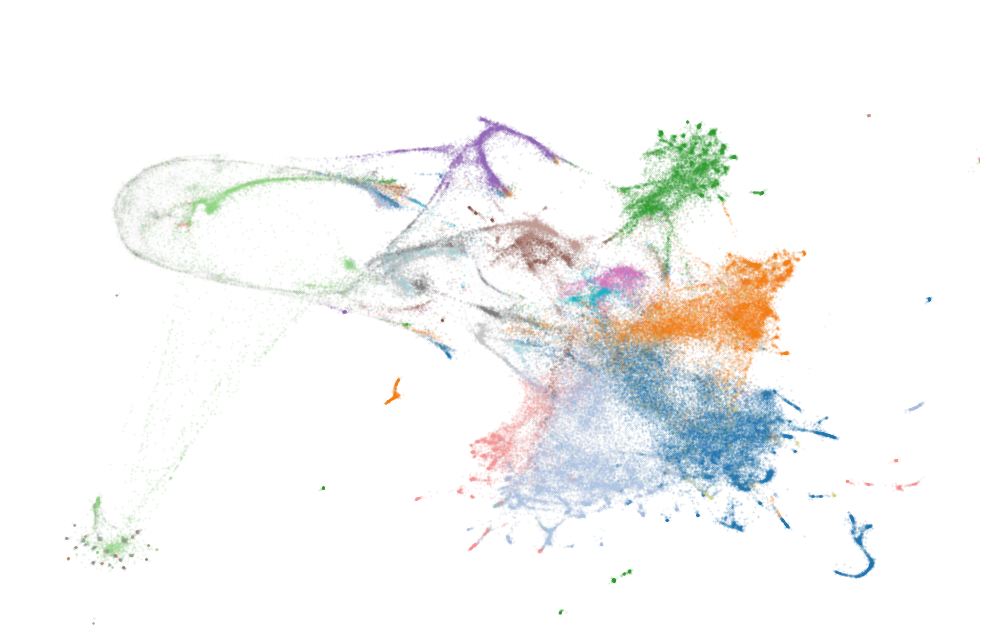

In [21]:
plots.make_tagged_LS_plot(df_proj2d,
            phones = unique_phones[:15],
            alpha = 0.25, 
            s = 0.1,
            show_global=True,
            xlim = [ -5, 20],
            ylim = [-3, 18],
            add_legend=False)
plt.axis('off')

Making a 2d plot


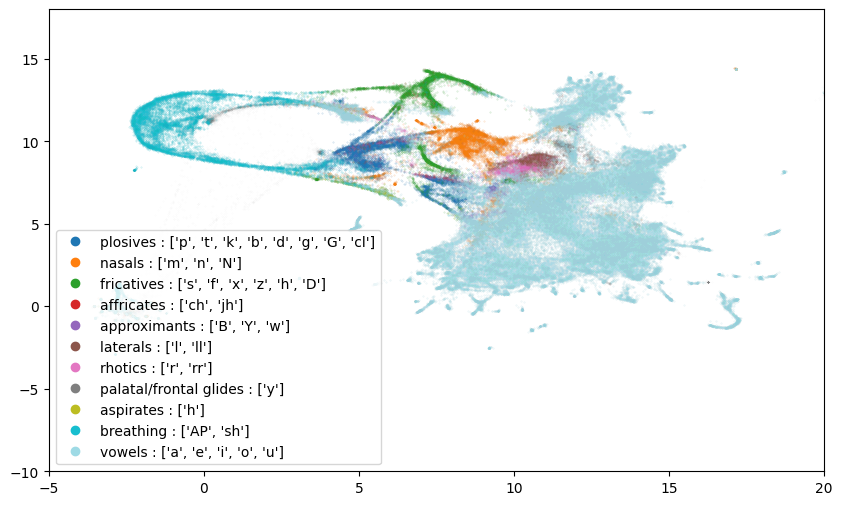

In [11]:
plots.make_tagged_LS_plot(df_proj2d,
            phones = ph_i.spanish_phones_grouped,
            alpha = 0.25, 
            s = 0.1,
            show_global=True,
            xlim = [ -5, 20],
            ylim = [-10, 18])

Making a 2d plot


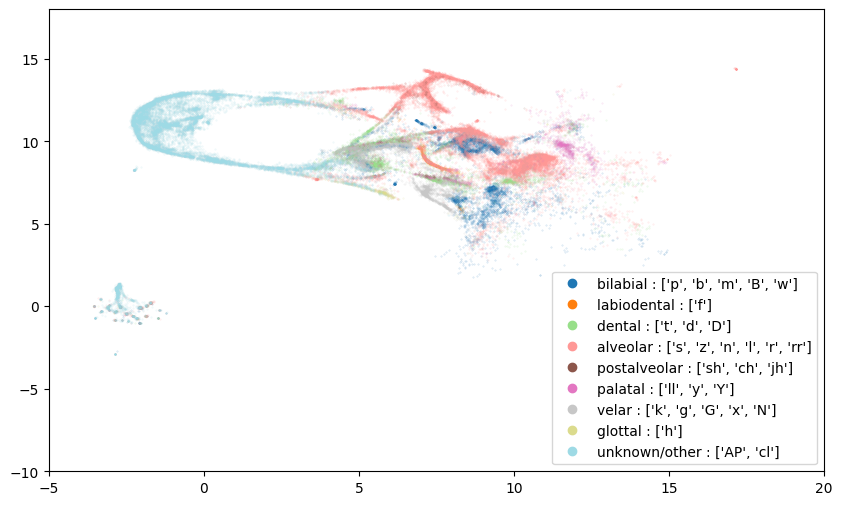

In [12]:
plots.make_tagged_LS_plot(df_proj2d,
            phones = ph_i.spanish_consonants_by_place,
            alpha = 0.25, 
            s = 0.1,
            show_global=False,
            xlim = [ -5, 20],
            ylim = [-10, 18])

Making a 2d plot


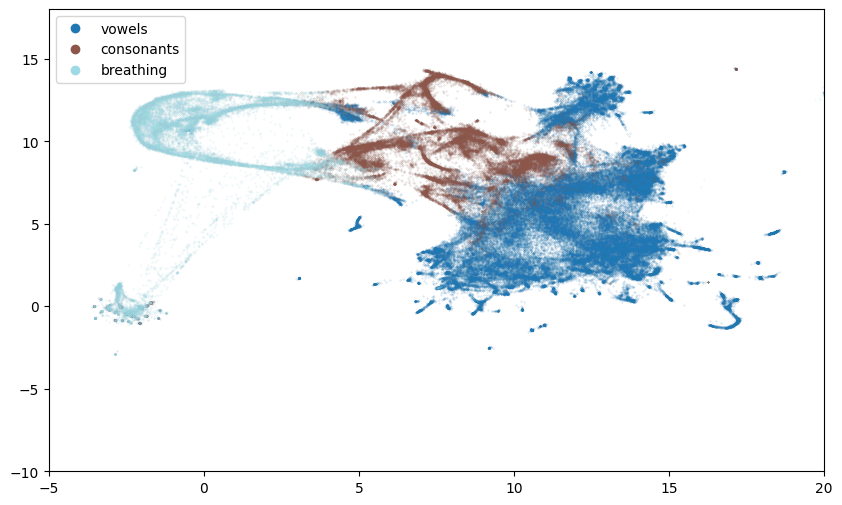

In [19]:
plots.make_tagged_LS_plot(df_proj2d,
            phones = ph_i.spanish_groups_vowels_consonants,
            alpha = 0.25, 
            s = 0.1,
            show_global=True,
            label_detail = False,
            xlim = [ -5, 20],
            ylim = [-10, 18])

Making a 2d plot


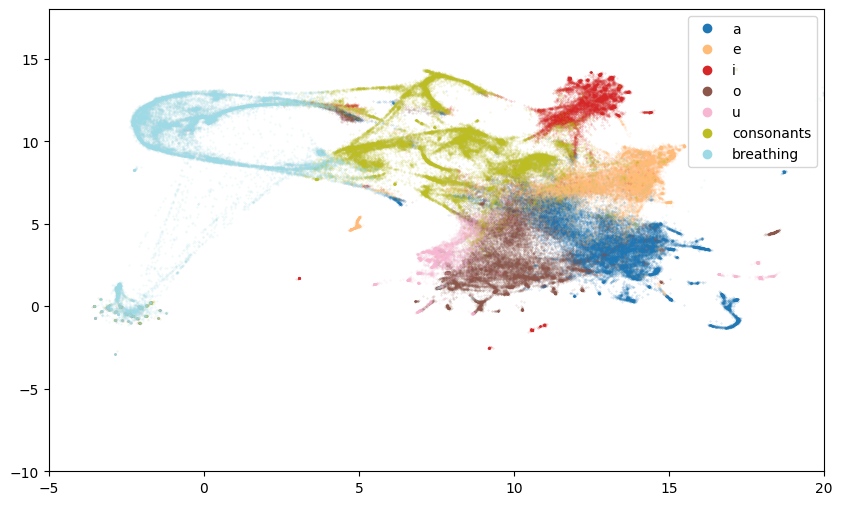

In [18]:
plots.make_tagged_LS_plot(df_proj2d,
            phones = ph_i.spanish_groups_vowels_consonants_v2,
            alpha = 0.25, 
            s = 0.1,
            show_global=False,
            label_detail = False,
            xlim = [ -5, 20],
            ylim = [-10, 18])

# Silhouette

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
drop_cols = ['phone_base', 'song']

df_filter = df_anotated_all[df_anotated_all['phone_base'].isin(['m', 'n'])]

X1 = df_filter.drop(columns = drop_cols).values
y1 = df_filter['phone_base'].values

In [ ]:
sil_score = silhouette_score(X1, y1, metric='cosine')
sil_score

In [ ]:
sample_silhouette_values = silhouette_samples(X1, y1, metric='cosine')

In [ ]:
plt.hist(sample_silhouette_values, bins=50)
plt.title("Distribution of Silhouette Scores per Sample")
plt.xlabel("Silhouette Score")
plt.ylabel("Number of Samples")
plt.show()

# Projection PCA, tSNE

In [58]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from utils import phone_info as ph_i 

In [59]:
import sklearn
print(sklearn.__version__)

1.7.0


In [ ]:
c1 = df_anotated_all['phone_base'] != 'SP'
drop_cols = ['phone_base', 'song']

df_no_sil = df_anotated_all[c1].reset_index(drop = True)
X_no_sil = df_no_sil.drop(columns=drop_cols).values

In [ ]:
pca = PCA(n_components=3)
X_reduced_PCA = pca.fit_transform(X_no_sil)

df_proj = pd.DataFrame(data = X_reduced_PCA, columns=['x', 'y', 'z'])
df_proj[['phone_base', 'song']] = df_anotated_all[['phone_base', 'song']]

Making a 3d plot


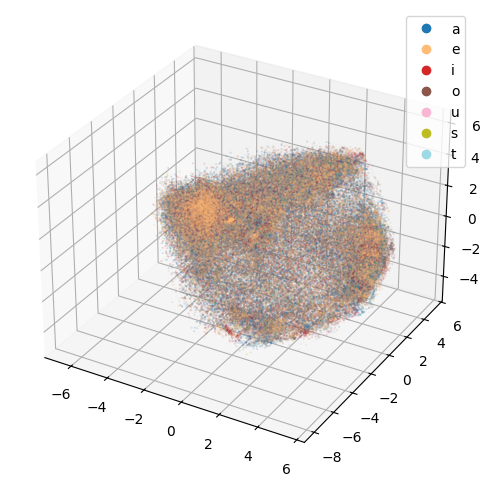

In [52]:
plots.make_tagged_LS_plot(df_proj,
            phones = ['a', 'e', 'i', 'o', 'u', 's', 't'],
            alpha = 0.25, 
            s = 0.1,
            show_global=True)

In [64]:
# Run t-SNE (you can adjust perplexity depending on dataset size)

# pca = PCA(n_components=50, 
#           random_state=42)
# X_reduced_PCA = pca.fit_transform(X_no_sil)

tsne = TSNE(n_components=2, 
            perplexity=40, 
            max_iter=1000, 
            init='pca', 
            random_state=42)

X_tsne = tsne.fit_transform(X_no_sil)

In [65]:
df_proj_tsne = pd.DataFrame(data = X_tsne, columns=['x', 'y'])
df_proj_tsne[['phone_base', 'song']] = df_anotated_all[['phone_base', 'song']]

Making a 2d plot


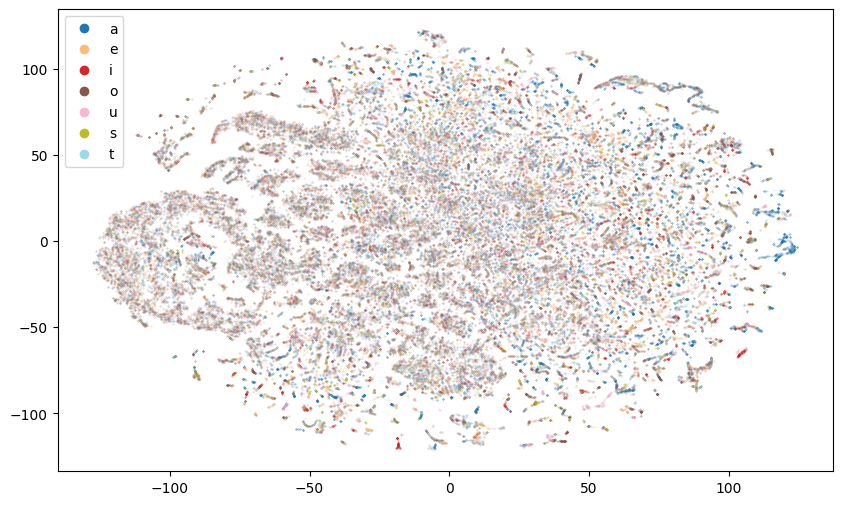

In [66]:
plots.make_tagged_LS_plot(df_proj_tsne,
            phones = ['a', 'e', 'i', 'o', 'u', 's', 't'],
            alpha = 0.25, 
            s = 0.1,
            show_global=True)

# Topology

In [7]:
import numpy as np
from gtda.homology import VietorisRipsPersistence
from collections import Counter

def compute_betti_numbers(X, max_points=5000, max_dimension=2, metric='euclidean', max_edge_length = 0.5):
    """
    Compute Betti numbers (topological features) of a high-dimensional dataset.

    Parameters:
        X : np.ndarray
            Data array of shape [N, D] (e.g., 150000 x 768).
        max_points : int
            Max number of points to sample (TDA doesn't scale well beyond 5–10k).
        max_dimension : int
            Maximum homology dimension (0: components, 1: loops, 2: voids).
        metric : str
            Distance metric for the Vietoris-Rips complex (e.g., 'euclidean', 'cosine').

    Returns:
        betti_counts : dict
            Dictionary {dimension: number of persistent features} for each dimension.
    """
    # Step 1: Sample the point cloud (or take the first max_points)
    if X.shape[0] > max_points:
        idx = np.random.choice(len(X), size=max_points, replace=False)
        X_sampled = X[idx]
    else:
        X_sampled = X

    # Step 2: Reshape to [1, n_points, dim] for giotto-tda
    X_sampled = X_sampled.reshape(1, X_sampled.shape[0], X_sampled.shape[1])

    # Step 3: Compute persistent homology
    vr = VietorisRipsPersistence(homology_dimensions=list(range(max_dimension + 1)),
                                 metric=metric,
                                 max_edge_length=max_edge_length)
    diagrams = vr.fit_transform(X_sampled)

    # Step 4: Count persistent features by dimension
    betti_counts = Counter(diagrams[0][:, 0].astype(int))  # diagrams[0]: [n_features, 3]
    
    return dict(betti_counts)


In [8]:
#c1 = df_anotated_all['phone_base'] != 'SP'
c1 = df_anotated_all['phone_base'] == 'a'
drop_cols = ['phone_base', 'song']

df_fiter = df_anotated_all[c1].reset_index(drop = True)
X_filter = df_fiter.drop(columns=drop_cols).values

In [ ]:
betti = compute_betti_numbers(X_filter, 
                              max_points=2000, 
                              max_dimension=2, 
                              metric='euclidean',
                              max_edge_length = 100)
print("Estimated Betti numbers:", betti)

# LID

In [23]:
drop_cols = ['phone_base', 'song']

df_filter = df_anotated_all[df_anotated_all['phone_base'].isin(['a', 's'])]

X1 = df_filter.drop(columns = drop_cols).values
y1 = df_filter['phone_base'].values

In [24]:
from skdim.id import MLE
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [43]:
# X: your latent space [N, D] — e.g., [150000, 768]
# y: labels for each frame — phoneme tags (same length as X)

def compute_lid(X, y=None, phoneme_filter=None, k=20):
    """
    Computes local intrinsic dimensionality (LID) for each point in X.

    Parameters:
        X: np.ndarray, shape [N, D]
            The latent space.
        y: np.ndarray or list, optional
            Labels (phoneme tags) for each point.
        phoneme_filter: str or list of str, optional
            If provided, only compute LID for these phonemes.
        k: int
            Number of neighbors to use for LID estimation.

    Returns:
        lid_values: np.ndarray, shape [M,]
            LID per point (M = len(X) or filtered).
        subset_labels: np.ndarray
            Labels (y) corresponding to LID values.
    """
    # Filter by phoneme(s) if provided
    if y is not None and phoneme_filter is not None:
        mask = np.isin(y, phoneme_filter)
        X = X[mask]
        y = np.array(y)[mask]
    else:
        y = np.array([''] * len(X))  # blank labels

    # Fit LID estimator
    estimator = MLE(K=k)
    lid = estimator.fit_transform(X)

    return lid.flatten(), y

In [44]:
# All data
lid_all, _ = compute_lid(X1, k=5)

# For just the /s/ phoneme
lid_s, labels_s = compute_lid(X1, y1, phoneme_filter='s', k=5)

# For just the /s/ phoneme
lid_a, labels_a = compute_lid(X1, y1, phoneme_filter='a', k=5)

In [45]:
lid_a, lid_s

(array([6.22221248]), array([10.35123552]))

In [35]:
lid_a, lid_s

(array([6.22221248]), array([10.35123552]))